## **NEXT WORD PREDICTION IS BASED ON LANGUAGE MODELLING**


**Language Modeling** is the task of predicting the next word (or character) in a sequence based on the context of previous words.

In Language Modelling the data is mostly unsupervised.

- The first thing is we need to convert this unsupervised data into supervised data.

- For Each word (or combination of word) we need to make input output pair.

- Convert this data into numerical features.

- Create Vocabulary.
- Replace the input output mapping with this vocabs indexes.
- Index to embeddings.
- And the same task we did previously
- The architecture will be different.


In [1]:
!pip install nltk

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from collections import Counter
from torch.utils.data import Dataset, DataLoader
from nltk.tokenize import word_tokenize
import nltk

In [3]:
my_document = """About the Program
How much does the Professional plan cost per month?
The Professional plan is priced at $19.99 per user, per month, billed annually.
Is there a free tier for small teams?
Yes, we offer a Basic Free Plan which supports up to 5 users and includes core task management features.
How do I integrate TaskFlow with my Slack channel?
You can set up the integration by navigating to 'Settings', selecting 'Integrations', and following the prompts to connect your Slack workspace.
What kind of security measures are in place to protect my project data?
We utilize end-to-end AES 256-bit encryption for all data and are ISO 27001 certified for information security.
Can I import existing projects from other software like Trello or Asana?
Absolutely. We provide a CSV import tool and direct migration support for Asana and Trello via our integration marketplace.
Does TaskFlow support Gantt charts for project visualization?
Yes, the Premium and Enterprise plans include full support for dynamic Gantt charts and dependency tracking.
What is the process for adding a new team member to a project?
In the project dashboard, click the 'Team' tab, then select 'Invite User' and enter their email address.
Is it possible to set up recurring tasks?
Yes, when creating a task, simply open the 'Recurrence' settings and define the daily, weekly, or monthly cycle.
Where can I find video tutorials on using advanced features?
All our tutorial videos are available on the 'Help Center' section of our website, organized by feature.
How do I submit a feature request or suggest an improvement?
You can submit suggestions directly through the 'Feedback' widget located in the bottom-right corner of the application interface.
Do you offer an API for custom development?
Yes, a comprehensive REST API is available for all paid subscriptions, documented on our developers portal.
How do I change the language of the application interface?
Go to 'User Profile Settings' and select your preferred language from the 'Locale' dropdown menu. We currently support 12 languages.
What is your policy regarding data backup?
All user data is backed up hourly to multiple geographically separate servers to ensure high availability and data integrity.
Can I track the time spent on individual tasks within the application?
Yes, our built-in Time Tracking feature allows users to start and stop timers directly on any task card.
I am having trouble logging in, what should I do?
First, try the 'Forgot Password' link. If that fails, clear your browser cache or try a different browser.
How long is the free trial for the Premium plan?
We offer a 14-day, no-commitment free trial of our full Premium features.
If I cancel my subscription, will I lose my data immediately?
No, your data will be retained for a grace period of 90 days after cancellation, allowing for reactivation or export.
Does TaskFlow support custom fields on task cards?
Custom fields are fully supported on the Professional and Enterprise plans, allowing you to tailor task metadata.
How do I generate a report showing project progress and team workload?
In the 'Reports' tab, you can select the project, date range, and metrics (like completion rate and utilization) to generate a PDF or CSV report.
Is TaskFlow compliant with major privacy regulations like GDPR and CCPA?
Yes, we are fully compliant with both GDPR and CCPA standards for data protection and privacy.
Where are your main servers hosted?
Our primary cloud servers are hosted with AWS across the US, Europe, and Asia-Pacific regions.
How can I get one-on-one help with setting up a complex workflow?
Customers on the Premium and Enterprise plans can schedule a free 30-minute onboarding call with a dedicated support specialist.
Can I receive notifications via email for task updates?
Yes, email notifications are enabled by default, but you can customize your preferences under 'Notification Settings'.
Is TaskFlow suitable for Agile project management?
Yes, we offer Kanban board views, sprint planning tools, and burndown charts, making us ideal for Agile teams.
What is the maximum number of projects I can manage?
There is no limit to the number of projects you can create on any of the paid subscription tiers.
Can I change the theme or appearance of the application?
Yes, you can customize the appearance by selecting light mode, dark mode, or a high-contrast theme in the 'Display Settings'.
How often is the software updated?
Minor updates and bug fixes are deployed weekly, while major feature releases occur on a quarterly cycle.
Do you offer bulk discounts for large enterprises?
Yes, we offer special tiered pricing for organizations with over 100 users. Please contact our sales team for a custom quote.
What happens if I forget my master password for encryption?
For security reasons, we cannot recover your master password. You will need to follow the account recovery process, which may result in data loss if you have no backup key.
Can I assign a single task to multiple team members?
Yes, you can assign up to five primary owners and an unlimited number of secondary collaborators to any single task.
Is the mobile app fully functional compared to the desktop version?
The mobile app provides all core task management and communication features, but advanced reporting and administration controls are limited to the desktop version.
How do I export my project data?
Go to the project settings, select 'Export Data', and choose your preferred format (JSON, CSV, or PDF).
Does TaskFlow integrate with Google Calendar or Outlook?
Yes, we offer two-way synchronization with both Google Calendar and Microsoft Outlook for deadline and event scheduling.
Can I set different access permissions for various users?
Yes, our user role management system allows you to define granular permissions (Admin, Editor, Viewer) at both the project and workspace level.
Where can I find the official service level agreement (SLA)?
The full Service Level Agreement detailing our uptime commitment and response times is published in the 'Legal' section of our website footer.
"""


**We are using built in tokenizer this time WORD_TOKENIZER**

In [4]:
# download nltk tokenizer
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [5]:
# Tokenizer
tokens = word_tokenize(my_document.lower())

In [6]:
# tokens

In [7]:
"""
Build Vocabulary using the tokens.

We will use counter to count the number of unique token and number of occurance.

Once we get all unique tokens we will iterate over them and just add the once not in the vocabs.
"""

vocabs = {'<unk>':0}

# Old Approach
# for t in tokens:
#   if t not in vocabs:
#     vocabs[t] = len(vocabs)

# new approach with counter
for token in Counter(tokens).keys():
  if token not in vocabs:
    vocabs[token] = len(vocabs)


In [8]:
vocabs

{'<unk>': 0,
 'about': 1,
 'the': 2,
 'program': 3,
 'how': 4,
 'much': 5,
 'does': 6,
 'professional': 7,
 'plan': 8,
 'cost': 9,
 'per': 10,
 'month': 11,
 '?': 12,
 'is': 13,
 'priced': 14,
 'at': 15,
 '$': 16,
 '19.99': 17,
 'user': 18,
 ',': 19,
 'billed': 20,
 'annually': 21,
 '.': 22,
 'there': 23,
 'a': 24,
 'free': 25,
 'tier': 26,
 'for': 27,
 'small': 28,
 'teams': 29,
 'yes': 30,
 'we': 31,
 'offer': 32,
 'basic': 33,
 'which': 34,
 'supports': 35,
 'up': 36,
 'to': 37,
 '5': 38,
 'users': 39,
 'and': 40,
 'includes': 41,
 'core': 42,
 'task': 43,
 'management': 44,
 'features': 45,
 'do': 46,
 'i': 47,
 'integrate': 48,
 'taskflow': 49,
 'with': 50,
 'my': 51,
 'slack': 52,
 'channel': 53,
 'you': 54,
 'can': 55,
 'set': 56,
 'integration': 57,
 'by': 58,
 'navigating': 59,
 "'settings": 60,
 "'": 61,
 'selecting': 62,
 "'integrations": 63,
 'following': 64,
 'prompts': 65,
 'connect': 66,
 'your': 67,
 'workspace': 68,
 'what': 69,
 'kind': 70,
 'of': 71,
 'security': 72,

In [9]:
len(vocabs)

449

In [10]:
"""
Extract Sentence from Paragraph.
Split on basis of Line.
store the sentences in a list.
"""

input_sentences = my_document.split('\n')

In [11]:
len(input_sentences)

72

**Convert the input sentence into Numbers**

- Tokenize the sentence and replace it with there index of vocabs.

In [12]:
input_sentences[0]

'About the Program'

In [13]:
def text_to_indices(sentence,vocab):
  numerical_sentence = []

  """
  Check if the token of the sentence is present in the vocab or not.
  If present then return the index of that token from vocab.
  If not then return the index of unknown token
  """
  for token in sentence:
    if token in vocab:
      numerical_sentence.append(vocab[token])
    else:
      numerical_sentence.append(vocab['<unk>'])

  return numerical_sentence

In [14]:
input_numerical_sentences = []

for sentence in input_sentences:
  # word_tokenize(sentence.lower())
  num_tok = text_to_indices(word_tokenize(sentence.lower()), vocabs)

  input_numerical_sentences.append(num_tok)


In [15]:
len(input_numerical_sentences)

72

In [16]:
input_numerical_sentences[0]

[1, 2, 3]

**Now we can see that all our sentence are converted to Numbers**

#### Now from these 72 sentences we will generate Training Sequences.

Example:
1st sentence is [1,2,3] So we will get the sequence.
```
[1], [1,2], [1,2,3]
```

Basically what comes after what.

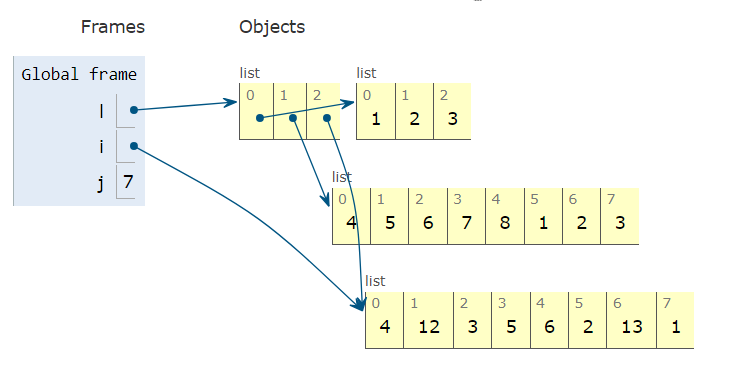

In [17]:
"""
Loop over list of sentences.
Loop over range(1, len of each sentence).
Why starting from 1 not 0, Becasue we only need sequence not individual
Now extarct the start to i+1 part of the sentence
"""
training_sequence = []

for sentence in input_numerical_sentences:

  for i in range(1, len(sentence)):

    # print(sentence[:i+1])
    training_sequence.append(sentence[:i+1])

In [18]:
len(training_sequence)

1070

This is the final lenght of the training data.

- Now the problem is each sequence have different length.

- When we send the sequence in Batches then our batches will wont work parallely. Because it needs all elements in that batch to be of same size.

- Thus to make everything uniform we need to add **Padding**

In [19]:
print(training_sequence[0])
print('='*10)
print(training_sequence[1])
print('='*10)
print(training_sequence[2])
print('='*10)
print(training_sequence[3])
print('='*10)
print(training_sequence[4])

[1, 2]
[1, 2, 3]
[4, 5]
[4, 5, 6]
[4, 5, 6, 2]


- Now when we will send out 1070 sentences all wil have different shapes. So batching will not work.

- How we will do the padding??
- We will add zeros.

- Where we will add zeros before or after current values??
- Before current values so that we can easily extract last value as `next sequence.`(target Lable)

- HOw many zeros and why needed zero???

We can make the lenght of each data same by either picking the biggest length word and adding zeros to each word to make all word of same size.
Example: Biggest--> 9999, Rest--> 2,3,4.

After Making uniform each will have same digits ==>> 0002, 0003,0004, 9999.

**This is what we are going to do because it is most effiecient way**

---

Or else we can pick the smallest and make all the word smallest, But this is not suitable


**HOw we are going to do that**

- find the longest sequence in training_sequence. (our case 35)

- Now add 35 zeroes in start of each token. But remove the number of zeros equal to number of tokens present in it.

- That means if sequence has 5 numbers already inside it, then add 30 zeros so overall length will be 35.


In [20]:
length_list = []

# calculate the lenght of each sequence
for sequence in training_sequence:
  length_list.append(len(sequence))

# get the max sequence
max(length_list)


35

In [21]:
"""
Padd zero at start of each sequence.
Add 35 zeros - len(current sequence)
"""

padded_training_sequence = []

for sequence in training_sequence:

  # This is the logic (5 characters then add 30 zeros only)
  # Generate zeros
  zeroes_list = [0]*(max(length_list)- len(sequence))

  # add zeros at start
  padded_training_sequence.append(zeroes_list + sequence)

In [22]:
len(padded_training_sequence)

1070

In [23]:
print(len(padded_training_sequence[1]))
print('='*30)
print(len(padded_training_sequence[2]))
print('='*30)
print(len(padded_training_sequence[3]))
print('='*30)

35
35
35


Now we have make them uniform sucessfully

In [24]:
"""
Convert them to Tensors
"""

padded_training_sequence = torch.tensor(padded_training_sequence, dtype=torch.long)

In [25]:
padded_training_sequence

tensor([[  0,   0,   0,  ...,   0,   1,   2],
        [  0,   0,   0,  ...,   1,   2,   3],
        [  0,   0,   0,  ...,   0,   4,   5],
        ...,
        [  0,   0,   0,  ...,  71, 108, 165],
        [  0,   0,   0,  ..., 108, 165, 448],
        [  0,   0,   0,  ..., 165, 448,  22]])

In [26]:
padded_training_sequence.shape

torch.Size([1070, 35])

**Now we have to Extarct X and Y from This**

This is simple because for y we have to just extarct the last value

In [27]:
# all till last
x = padded_training_sequence[:,:-1]

# all rows of last only
y = padded_training_sequence[:,-1]

In [28]:
x

tensor([[  0,   0,   0,  ...,   0,   0,   1],
        [  0,   0,   0,  ...,   0,   1,   2],
        [  0,   0,   0,  ...,   0,   0,   4],
        ...,
        [  0,   0,   0,  ..., 164,  71, 108],
        [  0,   0,   0,  ...,  71, 108, 165],
        [  0,   0,   0,  ..., 108, 165, 448]])

In [29]:
y

tensor([  2,   3,   5,  ..., 165, 448,  22])

In [30]:
x.shape

torch.Size([1070, 34])

In [31]:
y.shape

torch.Size([1070])

**Data Set Class**

In [32]:
class CustomDataset(Dataset):

  # constructor
  def __init__(self, x ,y):
    self.x = x
    self.y = y

  # len
  def __len__(self):
    return self.x.shape[0]

  # getitem
  def __getitem__(self, index):
    return self.x[index], self.y[index]


In [33]:
dataset = CustomDataset(x, y)

In [34]:
len(dataset)

1070

In [35]:
dataset[1]

(tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 1, 2]),
 tensor(3))

**Data Loader**

In [36]:
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [37]:
len(dataloader)
# 34 batches 1070/32

34

In [38]:
# for x,y in dataloader:
#   print(x.shape,y.shape)
# for x,y in dataloader:
#   print(x,y)

## **Model Building**

- We are extracting (32,34) as batches and send it to model. But before that we need to convert them into vector of dimension 100 as embedding.

- This will then become
`(32,34,100)`

- This `(32,34,100)` will go to our LSTM Architecture.

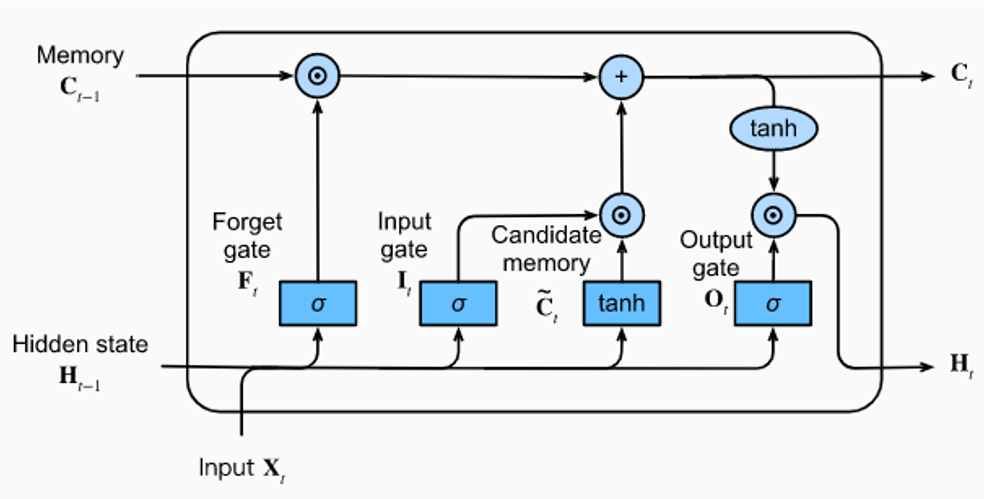

**What Happen in LSTM Cell**

- Suppose we have a 1 single input(1,34,100).

- We send a single embedding(input) at single time. Along with this we recieve cell state and hidden state as input.

- After some processing inside we get the updated cell state and updated hidden state output at each time stamp.

- If we are at the last time stamp then the last step hidden state will become the final output to user.

---


1. We send (1,34,100) at t=1, Here h=1 & c=1 will be some random number.

Here we have 34 words of each 100 dimension so we will send 1 word of 100 dimension to it.

2. Now we will recieve h=2 and c=2 after processing which will act as input to second cell and next word from our 34 words.

3. Now we will Loop this 34 times for a single sequence because our sentence have 34 words.

---

Now the same process will happen for a batch i.e In parellel for 32 set.

- 1st word of all 32 batch will go to input at t=1, after processing 2nd word of all 32 batch will go to input at t=2. and soo on.

- We will do this until all words are completed

---

**This was also the reason we made our inputs of same size for processing all sequence in parallel.**

In [39]:
class MyLSTM(nn.Module):

  # constructor
  def __init__(self, vocab_size):
    super().__init__()

    # create embedding layer
    self.embedding = nn.Embedding(vocab_size, embedding_dim=100)

    # LSTM Layer (input size, Number of neurons inside, batch_first=True)
    self.lstm = nn.LSTM(input_size=100,hidden_size=150,batch_first=True)

    # Linear(Input ,One Logit Per word)
    self.fc=nn.Linear(150, vocab_size)

  # forward
  def forward(self,sentence):
    """
    Now we know that we Recieve 3 inputs from
    See the Below test code for better understanding
    """
    # first embedd the sentence
    embedded_input = self.embedding(sentence)

    # intermediate, (final_state , cell_state)
    intermediate_hidden_states,(final_hidden_state, final_cell_state) =  self.lstm(embedded_input)

    # we need final_hidden_state
    final_output = self.fc(final_hidden_state.squeeze(0))

    return final_output

#### For testing:Manually Create Layers


In [40]:
x = nn.Embedding(len(vocabs), 100)
y = nn.LSTM(100,150,batch_first=True)
z = nn.Linear(150,len(vocabs))

In [41]:
dataset[0][0].shape

torch.Size([34])

In [42]:
a = dataset[0][0].unsqueeze(0)

In [43]:
x(a).shape

torch.Size([1, 34, 100])

1 Batch, with 34 words, each word with 100 dimensions

In [44]:
b = x(a)

In [45]:
b

tensor([[[ 0.1166,  0.2751, -0.9565,  ...,  2.0123, -0.9943, -1.3574],
         [ 0.1166,  0.2751, -0.9565,  ...,  2.0123, -0.9943, -1.3574],
         [ 0.1166,  0.2751, -0.9565,  ...,  2.0123, -0.9943, -1.3574],
         ...,
         [ 0.1166,  0.2751, -0.9565,  ...,  2.0123, -0.9943, -1.3574],
         [ 0.1166,  0.2751, -0.9565,  ...,  2.0123, -0.9943, -1.3574],
         [ 0.3742, -0.6388, -2.2610,  ...,  0.8167,  0.9625,  0.1254]]],
       grad_fn=<EmbeddingBackward0>)

In [46]:
y(b)

(tensor([[[-0.0612,  0.0203,  0.1396,  ..., -0.2655, -0.0995, -0.2787],
          [-0.0906,  0.0331,  0.2280,  ..., -0.3829, -0.1688, -0.4313],
          [-0.1075,  0.0406,  0.2774,  ..., -0.4326, -0.2155, -0.5106],
          ...,
          [-0.1337,  0.0519,  0.3428,  ..., -0.4736, -0.3003, -0.6225],
          [-0.1337,  0.0519,  0.3428,  ..., -0.4736, -0.3003, -0.6225],
          [-0.2084,  0.4144,  0.1538,  ...,  0.0061, -0.1870, -0.2624]]],
        grad_fn=<TransposeBackward0>),
 (tensor([[[-2.0837e-01,  4.1436e-01,  1.5380e-01, -1.2866e-01, -6.0036e-02,
            -6.1080e-02, -2.9400e-01,  5.9894e-02, -1.8515e-01,  4.0111e-02,
            -9.2708e-02, -2.2491e-01, -2.0070e-01,  1.1306e-01,  2.1807e-01,
             2.6294e-01, -1.7316e-01, -1.1635e-02,  2.5389e-01, -2.7336e-01,
             1.9428e-02, -1.1741e-01, -4.1313e-02, -4.0607e-02,  5.9523e-02,
             1.5782e-01,  7.7364e-02,  1.8334e-01,  8.5470e-02,  4.2104e-02,
            -4.1820e-01,  3.7694e-02, -1.1823e-02,

In [47]:
len(y(b))

2

In [48]:
c, h = y(b)

In [49]:
c

tensor([[[-0.0612,  0.0203,  0.1396,  ..., -0.2655, -0.0995, -0.2787],
         [-0.0906,  0.0331,  0.2280,  ..., -0.3829, -0.1688, -0.4313],
         [-0.1075,  0.0406,  0.2774,  ..., -0.4326, -0.2155, -0.5106],
         ...,
         [-0.1337,  0.0519,  0.3428,  ..., -0.4736, -0.3003, -0.6225],
         [-0.1337,  0.0519,  0.3428,  ..., -0.4736, -0.3003, -0.6225],
         [-0.2084,  0.4144,  0.1538,  ...,  0.0061, -0.1870, -0.2624]]],
       grad_fn=<TransposeBackward0>)

In [50]:
c.shape

torch.Size([1, 34, 150])

This is all Intermediate Hidden Space.
1 sequence with 34 words, 150 dimension.
150 Because we have 150 nodes.

**c is a set of all intermediate states**

In [51]:
h

(tensor([[[-2.0837e-01,  4.1436e-01,  1.5380e-01, -1.2866e-01, -6.0036e-02,
           -6.1080e-02, -2.9400e-01,  5.9894e-02, -1.8515e-01,  4.0111e-02,
           -9.2708e-02, -2.2491e-01, -2.0070e-01,  1.1306e-01,  2.1807e-01,
            2.6294e-01, -1.7316e-01, -1.1635e-02,  2.5389e-01, -2.7336e-01,
            1.9428e-02, -1.1741e-01, -4.1313e-02, -4.0607e-02,  5.9523e-02,
            1.5782e-01,  7.7364e-02,  1.8334e-01,  8.5470e-02,  4.2104e-02,
           -4.1820e-01,  3.7694e-02, -1.1823e-02, -2.3680e-01,  8.1575e-02,
            1.8425e-01, -3.2293e-01,  9.7242e-03, -1.1962e-01, -2.4607e-01,
            2.2058e-01,  7.7753e-03, -1.0031e-01, -5.9444e-02,  1.2223e-01,
            1.2224e-01, -2.1791e-01,  2.2476e-01,  4.6673e-02, -1.0843e-02,
            7.3925e-02, -1.4269e-01, -1.0932e-01, -1.6247e-01, -9.8513e-02,
            1.1469e-01, -3.2541e-03, -2.5875e-01,  1.6449e-02,  1.6985e-01,
            4.6547e-01, -1.0720e-01, -1.5031e-01, -6.8294e-02, -1.8608e-01,
           -

In [52]:
len(h)

2

h itself have 2 tuples so unpack

In [53]:
e, f = h

In [54]:
e

tensor([[[-2.0837e-01,  4.1436e-01,  1.5380e-01, -1.2866e-01, -6.0036e-02,
          -6.1080e-02, -2.9400e-01,  5.9894e-02, -1.8515e-01,  4.0111e-02,
          -9.2708e-02, -2.2491e-01, -2.0070e-01,  1.1306e-01,  2.1807e-01,
           2.6294e-01, -1.7316e-01, -1.1635e-02,  2.5389e-01, -2.7336e-01,
           1.9428e-02, -1.1741e-01, -4.1313e-02, -4.0607e-02,  5.9523e-02,
           1.5782e-01,  7.7364e-02,  1.8334e-01,  8.5470e-02,  4.2104e-02,
          -4.1820e-01,  3.7694e-02, -1.1823e-02, -2.3680e-01,  8.1575e-02,
           1.8425e-01, -3.2293e-01,  9.7242e-03, -1.1962e-01, -2.4607e-01,
           2.2058e-01,  7.7753e-03, -1.0031e-01, -5.9444e-02,  1.2223e-01,
           1.2224e-01, -2.1791e-01,  2.2476e-01,  4.6673e-02, -1.0843e-02,
           7.3925e-02, -1.4269e-01, -1.0932e-01, -1.6247e-01, -9.8513e-02,
           1.1469e-01, -3.2541e-03, -2.5875e-01,  1.6449e-02,  1.6985e-01,
           4.6547e-01, -1.0720e-01, -1.5031e-01, -6.8294e-02, -1.8608e-01,
          -6.0635e-02, -1

In [55]:
f

tensor([[[-3.7718e-01,  6.1513e-01,  3.9355e-01, -2.1231e-01, -1.1749e-01,
          -1.3961e-01, -4.9010e-01,  1.0672e-01, -3.5241e-01,  6.1341e-02,
          -1.5213e-01, -5.7542e-01, -8.7767e-01,  2.0276e-01,  7.1226e-01,
           6.4367e-01, -4.5507e-01, -2.2729e-02,  3.7420e-01, -3.8745e-01,
           2.8571e-02, -2.2895e-01, -6.8920e-02, -6.8487e-02,  1.6135e-01,
           2.7851e-01,  2.1123e-01,  4.7357e-01,  2.4460e-01,  8.3160e-02,
          -6.3492e-01,  6.6865e-02, -2.1173e-02, -4.6856e-01,  1.2056e-01,
           4.0653e-01, -5.5905e-01,  3.4911e-02, -2.3256e-01, -3.8853e-01,
           5.0865e-01,  1.5558e-02, -2.9271e-01, -1.6564e-01,  1.9217e-01,
           3.0103e-01, -4.7596e-01,  4.2653e-01,  6.7245e-02, -5.2131e-02,
           1.3939e-01, -4.1141e-01, -2.3823e-01, -3.7501e-01, -1.4632e-01,
           3.7258e-01, -6.6098e-03, -5.0284e-01,  2.8784e-02,  4.9708e-01,
           6.7735e-01, -1.8930e-01, -2.6947e-01, -1.3333e-01, -2.4829e-01,
          -1.4244e-01, -1

In [56]:
e.shape

torch.Size([1, 1, 150])

E is the final output which we will send to Flatten Layer, But not in a Batch so squeeze it

In [57]:
f.shape

torch.Size([1, 1, 150])

F is a cell state, at time stamp 1 hence 1 (1=batch_size, 1=time step, 150 our neuron output)

In [58]:
z(e.squeeze(0))

tensor([[ 1.9891e-01, -1.4216e-01,  4.9756e-02,  1.8594e-04,  1.7676e-02,
         -2.4257e-02, -8.7654e-02, -2.6494e-03, -1.2346e-03,  8.6702e-02,
         -9.4115e-02,  1.9788e-02,  1.0124e-01, -1.3672e-01, -2.8504e-02,
          1.4750e-01,  1.0202e-01,  9.4486e-02,  1.4328e-01,  1.0458e-02,
          7.9681e-02, -1.1169e-01, -1.5806e-02, -1.7677e-02, -7.8107e-02,
         -1.7652e-02, -3.1422e-02, -6.9899e-02, -6.7556e-03,  1.7555e-01,
         -1.0478e-01, -6.4503e-02,  3.5193e-02, -5.1959e-02,  1.8866e-01,
          2.4009e-01,  5.0389e-02,  5.1959e-02, -9.1376e-03,  1.0985e-01,
          2.5063e-02,  6.1123e-02,  6.6639e-02, -1.2716e-02,  4.0982e-02,
          5.0792e-02,  2.3683e-01, -1.3277e-01,  3.1233e-02, -1.1181e-01,
          1.6531e-01, -1.8053e-02, -3.7431e-02,  1.6702e-01,  2.1081e-01,
         -1.5588e-01, -2.6692e-02,  1.3472e-01,  7.2361e-02,  5.3359e-02,
          2.7512e-02,  1.5899e-02, -2.1782e-01, -1.7451e-01,  1.4389e-01,
          9.1813e-02, -9.0090e-02, -4.

In [59]:
z(e.squeeze(0)).shape

torch.Size([1, 449])

**See Here we are getting probs(logit) for all our vocabulary and based on this logit we will apply softmax and calculate the max probability for the word which can be next sequence**

In [60]:
# create model
model = MyLSTM(len(vocabs))

In [61]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [62]:
model.to(device)

MyLSTM(
  (embedding): Embedding(449, 100)
  (lstm): LSTM(100, 150, batch_first=True)
  (fc): Linear(in_features=150, out_features=449, bias=True)
)

In [63]:
# Params

epochs = 50
learning_rate = 0.001

criteria = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [64]:
# Training Loop

for epoch in range(epochs):

  total_loss = 0

  for batch_x, batch_y in dataloader:

    # move to gpu
    batch_x = batch_x.to(device)
    batch_y = batch_y.to(device)

    # clear gradients
    optimizer.zero_grad()

    # forward pass
    output = model.forward(batch_x)

    # loss
    loss = criteria(output, batch_y)

    # backprop
    loss.backward()

    # optimizer
    optimizer.step()

    total_loss += loss

  print(f"Epoch: {epoch + 1}, Loss: {total_loss:.4f}")
  print('-'*30)

Epoch: 1, Loss: 205.0316
------------------------------
Epoch: 2, Loss: 183.3295
------------------------------
Epoch: 3, Loss: 168.9189
------------------------------
Epoch: 4, Loss: 155.4973
------------------------------
Epoch: 5, Loss: 141.6836
------------------------------
Epoch: 6, Loss: 128.0467
------------------------------
Epoch: 7, Loss: 114.7546
------------------------------
Epoch: 8, Loss: 102.4936
------------------------------
Epoch: 9, Loss: 90.2863
------------------------------
Epoch: 10, Loss: 79.5062
------------------------------
Epoch: 11, Loss: 69.6634
------------------------------
Epoch: 12, Loss: 60.2936
------------------------------
Epoch: 13, Loss: 52.3672
------------------------------
Epoch: 14, Loss: 44.8927
------------------------------
Epoch: 15, Loss: 39.0965
------------------------------
Epoch: 16, Loss: 33.5919
------------------------------
Epoch: 17, Loss: 29.1782
------------------------------
Epoch: 18, Loss: 25.4613
------------------------

## **Prediction**

- tokenize the input recieved

- Convert the Recieved Text into Numbers.

- Add padding to match the same input size

- Padded Text to Model

- Model will give the output

- With output we will get the index of predicted word

- merged the predicted word with text.

- Return the merged text.

In [65]:
def prediction(model, vocab, text):

  # tokenize
  token_word = word_tokenize(text.lower())

  # index
  index_of_text = text_to_indices(token_word, vocab)

  # padding
  padded_text = [0] * (34 - len(index_of_text)) + index_of_text

  # tensor(batchsize, num of words)
  tensor_text = torch.tensor(padded_text, dtype=torch.long).unsqueeze(0)

  # send to model
  output = model.forward(tensor_text)

  # Fetch maximum value
  value, index = torch.max(output, dim=1)

  # Get word of the index
  next_word = list(vocab.keys())[index]

  # merge with text
  return text + " " + next_word

In [66]:
prediction(model, vocabs, "The course follows")

'The course follows security'

In [68]:
"""
To predict next n words
"""

import time

num_tokens = 10
input_text = "You can check the"

for i in range(num_tokens):
  output_text = prediction(model, vocabs, input_text)
  print(output_text)
  input_text = output_text
  time.sleep(0.5)


You can check the professional
You can check the professional plan
You can check the professional plan cost
You can check the professional plan cost per
You can check the professional plan cost per month
You can check the professional plan cost per month ,
You can check the professional plan cost per month , or
You can check the professional plan cost per month , or pdf
You can check the professional plan cost per month , or pdf )
You can check the professional plan cost per month , or pdf ) ?


## EValuation

In [69]:
dataloader1 = DataLoader(dataset, batch_size=32, shuffle=False)

In [70]:
model.eval()

MyLSTM(
  (embedding): Embedding(449, 100)
  (lstm): LSTM(100, 150, batch_first=True)
  (fc): Linear(in_features=150, out_features=449, bias=True)
)

In [71]:
# Function to calculate accuracy
def calculate_accuracy(model, dataloader, device):
    correct = 0
    total = 0

    with torch.no_grad():  # No need to compute gradients
        for batch_x, batch_y in dataloader1:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)

            # Get model predictions
            outputs = model(batch_x)

            # Get the predicted word indices
            _, predicted = torch.max(outputs, dim=1)

            # Compare with actual labels
            correct += (predicted == batch_y).sum().item()
            total += batch_y.size(0)

    accuracy = correct / total * 100
    return accuracy

# Compute accuracy
accuracy = calculate_accuracy(model, dataloader, device)
print(f"Model Accuracy: {accuracy:.2f}%")


Model Accuracy: 95.61%
